In [1]:
import pandas as pd
import numpy as np
import nolearn
import matplotlib.pyplot as plt
import seaborn
import sklearn.linear_model as lm
import scipy.stats as sps
import math

from Bio import SeqIO
from collections import Counter
from decimal import Decimal
from lasagne import layers, nonlinearities
from lasagne.updates import nesterov_momentum
from lasagne import layers
from nolearn.lasagne import NeuralNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.svm import SVR

seaborn.set_style('white')
seaborn.set_context('poster')

%matplotlib inline

Using gpu device 0: Quadro 2000


In [7]:
# Read in the protease inhibitor data
widths = [8]
widths.extend([4]*8)
widths.extend([4]*99)
data = pd.read_csv('hiv-nrt-data.csv', index_col='SeqID')
data

,3TC,ABC,AZT,D4T,DDI,TDF,P1,P2,P3,P4,...,P231,P232,P233,P234,P235,P236,P237,P238,P239,P240
SeqID,,,,,,,,,,,,,,,,,,,,,
2997,200.00,4.3,3.9,1.4,1.2,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4388,200.00,8.1,4.7,1.8,1.7,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,-,.
4427,1.40,1.1,28.0,1.0,0.8,1.9,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4487,1.80,1.5,7.1,1.2,1.1,1.1,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4539,200.00,3.7,4.5,2.0,1.3,NaN,-,-,-,-,...,.,.,.,.,.,.,.,.,.,.
4663,200.00,7.1,0.8,1.3,1.9,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4689,2.55,5.2,6.7,5.4,5.3,0.9,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4697,200.00,5.9,1.9,1.3,1.7,NaN,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5071,200.00,6.3,5.2,1.4,1.9,0.9,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [9]:
# Set the drug data columns and the amino acid data columns
drug_cols = data.columns[0:6]
feat_cols = data.columns[6:]

In [10]:
# Read in the consensus data
consensus = SeqIO.read('hiv-rt-consensus.fasta', 'fasta')

consensus_map = {i+1:letter for i, letter in enumerate(str(consensus.seq))}

In [11]:
# Because there are '-' characters in the dataset, representing consensus sequence at each of the positions, 
# they need to be replaced with the actual consensus letter.

for i, col in enumerate(feat_cols):
    # Replace '-' with the consensus letter.
    data[col] = data[col].replace({'-':consensus_map[i+1]})
    
    # Replace '.' with np.nan
    data[col] = data[col].replace({'.':np.nan})
    
    # Replace 'X' with np.nan
    data[col] = data[col].replace({'X':np.nan})

In [12]:
# Drop any feat_cols that have np.nan inside them. We don't want low quality sequences.
data.dropna(inplace=True, subset=feat_cols)

In [13]:
data

,3TC,ABC,AZT,D4T,DDI,TDF,P1,P2,P3,P4,...,P231,P232,P233,P234,P235,P236,P237,P238,P239,P240
SeqID,,,,,,,,,,,,,,,,,,,,,
4427,1.40,1.1,28.0,1.0,0.8,1.9,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
4487,1.80,1.5,7.1,1.2,1.1,1.1,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
4663,200.00,7.1,0.8,1.3,1.9,NaN,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
4689,2.55,5.2,6.7,5.4,5.3,0.9,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
4697,200.00,5.9,1.9,1.3,1.7,NaN,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
5071,200.00,6.3,5.2,1.4,1.9,0.9,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
5222,200.00,5.7,0.3,1.2,2.0,NaN,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
5280,6.20,4.5,1000.0,2.4,1.6,5.0,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T
5445,3.30,4.9,177.0,2.9,1.6,2.2,P,I,S,P,...,G,Y,E,L,H,P,D,K,W,T


In [14]:
# Drop any feat_cols that are completely conserved.

# The nonconserved_cols list will serve as a convenient selector for the X- data from the 
# original dataframe.
nonconserved_cols = []
for col in feat_cols:
    if len(pd.unique(data[col])) == 1:
        data.drop(col, axis=1, inplace=True)
        
    else:
        nonconserved_cols.append(col)

In [15]:
drug_cols

Index(['3TC', 'ABC', 'AZT', 'D4T', 'DDI', 'TDF'], dtype='object')

In [136]:
def x_equals_y(y_test):
    """
    A function that returns a range from minimum to maximum of y_test.
    
    Used below in the plotting below.
    """
    floor = math.floor(np.min(y_test))
    ceil = math.ceil(np.max(y_test))
    x_eq_y = range(floor, ceil)
    return x_eq_y

TWOPLACES = Decimal(10) ** -2

In [152]:
colnum = 3

drug_df = pd.DataFrame()
drug_df[drug_cols[colnum]] = data[drug_cols[colnum]]
drug_df[nonconserved_cols] = data[nonconserved_cols]
for col in nonconserved_cols:
    drug_df[col] = drug_df[col].apply(lambda x: np.nan if len(x) > 1 else x)
drug_df.dropna(inplace=True)

drug_X = drug_df[nonconserved_cols]
drug_Y = drug_df[drug_cols[colnum]].apply(lambda x:np.log(x))
# drug_Y.values

In [153]:
from isoelectric_point import isoelectric_points
from molecular_weight import molecular_weights

# Standardize pI matrix. 7 is neutral
drug_X_pi = drug_X.replace(isoelectric_points)

# Standardize MW matrix.
drug_X_mw = drug_X.replace(molecular_weights)

# Binarize drug_X matrix.
from sklearn.preprocessing import LabelBinarizer
drug_X_bi = pd.DataFrame()
binarizers = dict()

for col in drug_X.columns:
    lb = LabelBinarizer()
    binarized_cols = lb.fit_transform(drug_X[col])
    # print(binarized_cols)
    if len(lb.classes_) == 2:
        # print(binarized_cols)
        drug_X_bi[col] = pd.Series(binarized_cols[:,0])
    else:
        for i, c in enumerate(lb.classes_):
            # print(col + c)
            # print(binarized_cols[:,i])

            drug_X_bi[col + '_' + c] = binarized_cols[:,i]
        
drug_X_bi

,P1,P2,P3_C,P3_N,P3_S,P4_P,P4_S,P4_T,P5_I,P5_S,...,P237_E,P237_N,P238_K,P238_R,P238_T,P239,P240_A,P240_E,P240_K,P240_T
0,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
2,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
4,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
5,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
6,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
7,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
8,1,0,0,0,1,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
9,1,0,0,0,1,1,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1


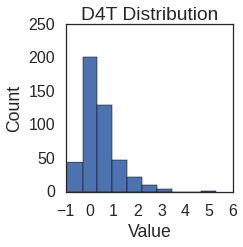

In [154]:
fig = plt.figure(figsize=(3,3))
drug_Y.hist(grid=False)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('{0} Distribution'.format(drug_cols[colnum]))

0.786368305999 0.132429943561


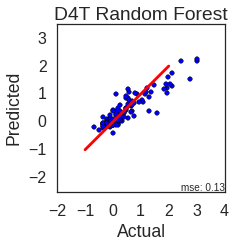

In [155]:
# Here, let's try the Random Forest Regressor. This will be the baseline.
x_train, x_test, y_train, y_test = train_test_split(drug_X_bi, drug_Y)

rfr = RandomForestRegressor(n_estimators=500, n_jobs=-1, oob_score=True)

rfr.fit(x_train, y_train)
rfr_preds = rfr.predict(x_test)
print(rfr.score(x_test, y_test), mean_squared_error(rfr_preds, y_test))
rfr_mse = mean_squared_error(rfr_preds, y_test)
# print(rfr.oob_score_)
sps.pearsonr(rfr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(y_test, rfr_preds,)
plt.title('{0} Random Forest'.format(drug_cols[colnum]))
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(rfr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

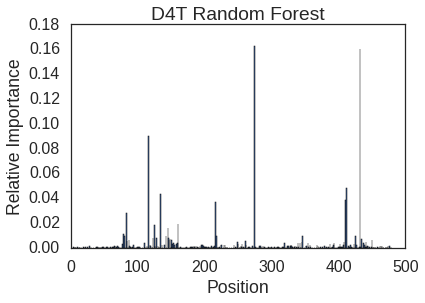

In [156]:
plt.bar(range(len(rfr.feature_importances_)), rfr.feature_importances_)
plt.xlabel('Position')
plt.ylabel('Relative Importance')
plt.title('{0} Random Forest'.format(drug_cols[colnum]))

In [157]:
# Get back the importance of each feature.
feat_impt = [(p, i) for p, i in zip(drug_X_bi.columns, rfr.feature_importances_)]
sorted(feat_impt, key=lambda x:x[1], reverse=True)

[('P151', 0.16251462938669017),
 ('P215_T', 0.16006592453195229),
 ('P62', 0.089598402308289846),
 ('P210_W', 0.04805732919349797),
 ('P69_#', 0.043176594447178349),
 ('P210_L', 0.03820719628644869),
 ('P116', 0.036923518809471458),
 ('P41_L', 0.027512755954099771),
 ('P77', 0.018855167959727394),
 ('P67_D', 0.018461063073661806),
 ('P70_K', 0.016167279408335643),
 ('P40_E', 0.010868828402363542),
 ('P215_D', 0.0097352909437584643),
 ('P40_F', 0.0095284336496718729),
 ('P118', 0.0093069566910762534),
 ('P69_T', 0.0091408832193107317),
 ('P184_V', 0.0089808668340186793),
 ('P65', 0.0078659771260242446),
 ('P67_N', 0.0078486143018055513),
 ('P70_N', 0.0076543349919679102),
 ('P70_d', 0.0072499899020392116),
 ('P215_Y', 0.0071962504233967191),
 ('P223_N', 0.0062562829205002248),
 ('P43_E', 0.0060866113487613007),
 ('P73', 0.0060846705519703387),
 ('P70_R', 0.0060199337114942904),
 ('P139_S', 0.0053925554834850821),
 ('P41_M', 0.0052268298420678544),
 ('P184_M', 0.0047365291124894888),
 ('

In [158]:
# # Here, let's try a parameter grid search, to figure out what would be the best 
# from sklearn.grid_search import GridSearchCV
# import numpy as np

# param_grid = [{'n_estimators':[100, 500, 1000],
#                #'max_features':['auto', 'sqrt', 'log2'],
#                #'min_samples_leaf':np.arange(1,20,1),
#               }]

# x_train, x_test, y_train, y_test = train_test_split(fpv_X_bi, fpv_Y)


# rfr_gs = GridSearchCV(RandomForestRegressor(), param_grid=param_grid, n_jobs=-1)
# rfr_gs.fit(x_train, y_train)
# print(rfr_gs.best_estimator_)
# print(rfr_gs.best_params_)

0.77269618709 0.140905268087
(0.88401111341649008, 4.0613783272294827e-39)


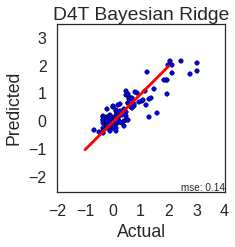

In [159]:
# Try Bayesian Ridge Regression
# x_train, x_test, y_train, y_test = train_test_split(drug_X_bi, drug_Y)

brr = lm.BayesianRidge()
brr.fit(x_train, y_train)
brr_preds = brr.predict(x_test)
print(brr.score(x_test, y_test), mean_squared_error(brr_preds, y_test))
print(sps.pearsonr(brr_preds, y_test))
brr_mse = mean_squared_error(brr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(y_test, brr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} Bayesian Ridge'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(brr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

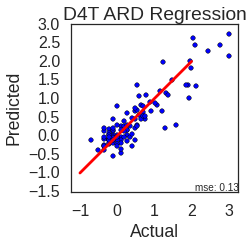

In [160]:
# Try ARD regression
ardr = lm.ARDRegression()
ardr.fit(x_train, y_train)
ardr_preds = ardr.predict(x_test)
ardr_mse = mean_squared_error(ardr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(y_test, ardr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} ARD Regression'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(ardr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

0.800344680916 0.123766011227
(0.8991383071394452, 2.3372440847266272e-42)


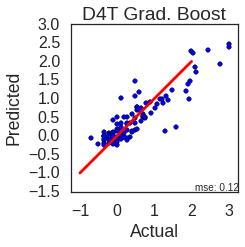

In [161]:
# Try Gradient Boost
# x_train, x_test, y_train, y_test = train_test_split(drug_X_bi, drug_Y)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
gbr_preds = gbr.predict(x_test)
print(gbr.score(x_test, y_test), mean_squared_error(gbr_preds, y_test))
print(sps.pearsonr(gbr_preds, y_test))
gbr_mse = mean_squared_error(gbr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(y_test, gbr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} Grad. Boost'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(gbr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

<Container object of 482 artists>

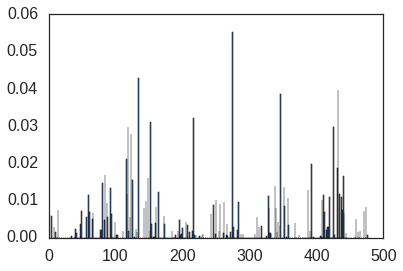

In [162]:
plt.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)

0.701945703317 0.184763379201
(0.87256175470337738, 5.9504271811245195e-37)


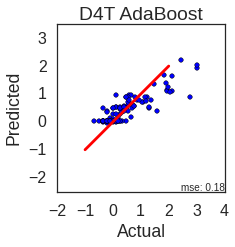

In [163]:
# Try AdaBoost
# x_train, x_test, y_train, y_test = train_test_split(drug_X_bi, drug_Y)

abr = AdaBoostRegressor()
abr.fit(x_train, y_train)
abr_preds = abr.predict(x_test)
print(abr.score(x_test, y_test), mean_squared_error(abr_preds, y_test))
print(sps.pearsonr(abr_preds, y_test))
abr_mse = mean_squared_error(abr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(x=y_test, y=abr_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} AdaBoost'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(abr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

<Container object of 482 artists>

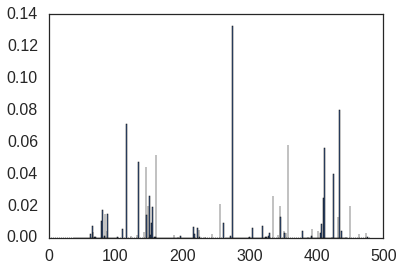

In [164]:
plt.bar(range(len(abr.feature_importances_)), abr.feature_importances_)

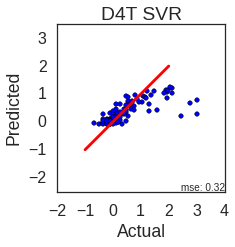

In [165]:
# Try support vector regression
svr = SVR()
svr.fit(x_train, y_train)
svr_preds = svr.predict(x_test)

svr_mse = mean_squared_error(svr_preds, y_test)

plt.figure(figsize=(3,3))
plt.scatter(y_test, svr_preds, )
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} SVR'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(svr_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

In [166]:
# Neural Network 1 Specification: Feed Forward ANN with 1 hidden layer.
# x_train, x_test, y_train, y_test = train_test_split(drug_X_bi, drug_Y)

x_train = x_train.astype(np.float32)
y_train = y_train.astype(np.float32)
x_test = x_test.astype(np.float32)
y_test = y_test.astype(np.float32)

net1 = NeuralNet(
    layers=[  # three layers: one hidden layer
        ('input', layers.InputLayer),
        ('hidden1', layers.DenseLayer),
        ('dropout1', layers.DropoutLayer),
        #('hidden2', layers.DenseLayer),
        #('dropout2', layers.DropoutLayer),
        ('nonlinear', layers.NonlinearityLayer),
        ('output', layers.DenseLayer),
        ],
    # layer parameters:
    input_shape=(None, x_train.shape[1]),  # 
    hidden1_num_units=math.ceil(x_train.shape[1] / 2),  # number of units in hidden layer
    hidden1_nonlinearity=nonlinearities.tanh,
    dropout1_p = 0.5,
    #hidden2_num_units=math.ceil(x_train.shape[1] / 2),
    #dropout2_p = 0.5,
    output_nonlinearity=None,  # output layer uses identity function
    output_num_units=1,  # 30 target values
    
    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.95,

    regression=True,  # flag to indicate we're dealing with regression problem
    max_epochs=500,  # we want to train this many epochs
    verbose=1,
    )
net1.fit(x_train.values, y_train.values)

# Neural Network with 116645 learnable parameters

## Layer information

  #  name         size
---  ---------  ------
  0  input         482
  1  hidden1       241
  2  dropout1      241
  3  nonlinear     241
  4  output          1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       1.19743       1.68213      0.71185  0.01s
      2       1.95433       0.72601      2.69189  0.01s
      3       0.94574       0.30878      3.06285  0.01s
      4       0.66858       0.31704      2.10884  0.01s
      5       0.53894       0.26701      2.01844  0.01s
      6       0.50842       0.25242      2.01423  0.01s
      7       0.40975       0.24942      1.64282  0.01s
      8       0.50461       0.23500      2.14729  0.01s
      9       0.31233       0.32754      0.95357  0.01s
     10       0.38249       0.29446      1.29897  0.01s
     11       0.29550       0.25208      1.17227  0.01s
     12       0.24624       0.22847    

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fa67253e358>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fa67253e550>,
     custom_score=None, dropout1_p=0.5,
     hidden1_nonlinearity=<function tanh at 0x7fa62838ff28>,
     hidden1_num_units=241, input_shape=(None, 482),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden1', <class 'lasagne.layers.dense.DenseLayer'>), ('dropout1', <class 'lasagne.layers.noise.DropoutLayer'>), ('nonlinear', <class 'lasagne.layers.dense.NonlinearityLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=500, more_params={},
     objective=<function objective at 0x7fa672540510>,
     objective_loss_function=<function squared_error at 0x7fa6280fc840>,
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog object at 0x7fa5c2153b00>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.

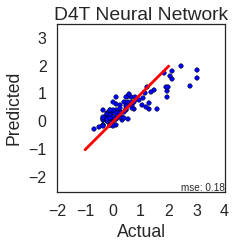

In [167]:
nn1_preds = net1.predict(x_test)
nn1_mse = float(mean_squared_error(nn1_preds, y_test))

plt.figure(figsize=(3,3))
plt.scatter(y_test, nn1_preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('{0} Neural Network'.format(drug_cols[colnum]))
plt.gca().set_aspect('equal', 'datalim')
plt.annotate(s='mse: {0}'.format(str(Decimal(nn1_mse).quantize(TWOPLACES))), xy=(1,0), xycoords='axes fraction', ha='right', va='bottom')
plt.plot(x_equals_y(y_test), x_equals_y(y_test), color='red')
plt.show()

In [168]:
sps.pearsonr(nn1_preds, y_test.reshape(y_test.shape[0],1))

(array([ 0.87914544], dtype=float32), array([  3.59665475e-38], dtype=float32))